In [59]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import json

In [60]:
DATASET = 'mnist'
# DATASET = 'wine_quality'

if DATASET == 'mnist':
    DATASET_STR = 'MNIST'
elif DATASET == 'wine_quality':
    DATASET_STR = 'Wine Quality'

In [61]:
def get_curves(df):
    valid_curves = []
    for i, row in df.iterrows():
        valid_curves.append(eval(row['validation_scores']))
    max_i = max([len(curve) for curve in valid_curves])
    valid_curve_mean = np.zeros(max_i)
    valid_curve_std = np.zeros(max_i)
    for i in range(max_i):
        vals = []
        for curve in valid_curves:
            if i < len(curve):
                vals.append(curve[i])
            else:
                vals.append(curve[-1])
        valid_curve_mean[i] = np.mean(vals)
        valid_curve_std[i] = np.std(vals)
    return valid_curve_mean, valid_curve_std

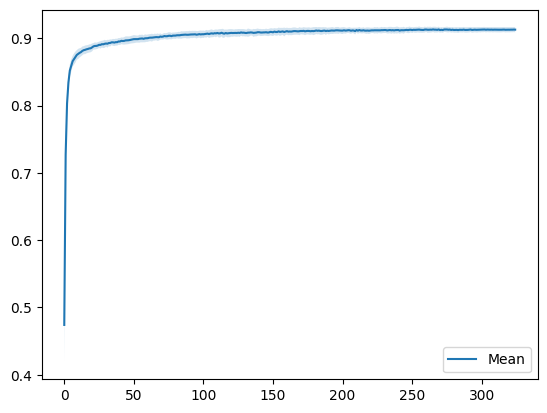

In [62]:
df = pd.read_csv(f'results/step_4/{DATASET}/PCA_metrics.csv')
valid_curves = []
for i, row in df.iterrows():
    valid_curves.append(eval(row['validation_scores']))

# max_i = max([len(curve) for curve in valid_curves])
# valid_curve_mean = np.zeros(max_i)
# valid_curve_std = np.zeros(max_i)
# for i in range(max_i):
#     vals = []
#     for curve in valid_curves:
#         if i < len(curve):
#             vals.append(curve[i])
#         else:
#             vals.append(curve[-1])
#     valid_curve_mean[i] = np.mean(vals)
#     valid_curve_std[i] = np.std(vals)
valid_curve_mean, valid_curve_std = get_curves(df)

# plt.ylim(0.95, 1)
# plt.plot(valid_curves[0], label='0')
# plt.plot(valid_curves[1], label='1')
# plt.plot(valid_curves[2], label='2')
# plt.plot(valid_curves[3], label='3')
# plt.plot(valid_curves[4], label='4')
plt.plot(valid_curve_mean, label='Mean')
plt.fill_between(range(len(valid_curve_mean)), valid_curve_mean - valid_curve_std, valid_curve_mean + valid_curve_std, alpha=0.2)
plt.legend()

In [63]:
curves = {
    DIM_RED_METHOD: get_curves(pd.read_csv(f'results/step_4/{DATASET}/{DIM_RED_METHOD}_metrics.csv'))
    for DIM_RED_METHOD in ['PCA', 'ICA', 'RP', 'LLE']
}
df = pd.read_csv(f'results/step_4/{DATASET}/baseline_metrics.csv')
curves['baseline'] = get_curves(df)

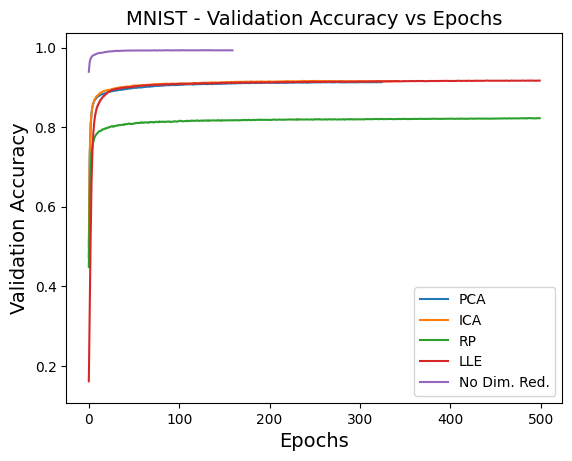

In [64]:
for method, (valid_curve_mean, valid_curve_std) in curves.items():
    if method == 'baseline':
        method = 'No Dim. Red.'
        # n = 1.05
        # valid_curve_mean = valid_curve_mean.copy() * n
        # valid_curve_std = valid_curve_std.copy() * n
    plt.plot(valid_curve_mean, label=method)
    n = 0.25
    plt.fill_between(range(len(valid_curve_mean)), valid_curve_mean-valid_curve_std*n, valid_curve_mean+valid_curve_std*n, alpha=0.2)

plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Validation Accuracy', fontsize=14)
# plt.title(f'{METHOD} - {DIM_RED_METHOD} - {DATASET_STR} - {metric_str} vs Number of components')

# plt.ylim(0.98, 0.995)
plt.legend()
plt.title(f'{DATASET_STR} - Validation Accuracy vs Epochs', fontsize=14)

path = f'figures/step_4/{DATASET}.png'
os.makedirs(os.path.dirname(path), exist_ok=True)
plt.savefig(path)

In [65]:
metrics_df = pd.DataFrame()
for i, method in enumerate(['PCA', 'ICA', 'RP', 'LLE', 'baseline']):
    if method == 'baseline':
        df = pd.read_csv(f'results/step_4/{DATASET}/baseline_metrics.csv')
    else:
        df = pd.read_csv(f'results/step_4/{DATASET}/{method}_metrics.csv')
    training_time_mean = df['training_time'].mean()
    training_time_std = df['training_time'].std()
    metrics_df.loc[i, 'Method'] = method
    metrics_df.loc[i, 'Training Time Mean'] = training_time_mean
    metrics_df.loc[i, 'Training Time Std'] = training_time_std
metrics_df.style.hide(axis='index')

Method,Training Time Mean,Training Time Std
PCA,100.588549,23.057139
ICA,80.644149,27.655710
RP,94.781979,56.975946
LLE,124.144171,45.038290
baseline,4.335479,1.239308


In [66]:
df['training_time'].mean()

4.335478541796329